In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline 
sns.set(style="ticks")

In [68]:
data = pd.read_csv('C:/Users/Kotos/Desktop/fifa_eda.csv', sep=",")
data = data.drop_duplicates()

In [69]:
# Список колонок с типами данных
data.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Skill Moves                 float64
Position                     object
Joined                        int64
Contract Valid Until         object
Height                      float64
Weight                      float64
Release Clause              float64
dtype: object

In [70]:
lename=LabelEncoder()
data['Name']=lename.fit_transform(data['Name'])
lenation=LabelEncoder()
data['Nationality']=lenation.fit_transform(data['Nationality'])
leclub=LabelEncoder()
data['Club']=leclub.fit_transform(data['Club'])
lefoot=LabelEncoder()
data['Preferred Foot']=lefoot.fit_transform(data['Preferred Foot'])
lepisit=LabelEncoder()
data['Position']=lepisit.fit_transform(data['Position'])
lecont=LabelEncoder()
data['Contract Valid Until']=lecont.fit_transform(data['Contract Valid Until'])

In [71]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,9632,31,6,94,94,212,110500.0,565.0,0,5.0,4.0,21,2004,29,5.583333,159.0,226500.0
1,20801,3153,33,123,94,94,326,77000.0,405.0,1,5.0,5.0,26,2018,30,6.166667,183.0,127100.0
2,190871,12508,26,20,92,93,435,118500.0,290.0,1,5.0,5.0,14,2017,30,5.750000,150.0,228100.0
3,193080,4136,27,139,91,93,375,72000.0,260.0,1,4.0,1.0,5,2011,25,6.333333,168.0,138600.0
4,192985,8617,27,13,91,92,374,102000.0,355.0,1,4.0,4.0,19,2015,31,5.916667,154.0,196400.0


In [72]:
# проверим есть ли пропущенные значения
data.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                          0
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until          0
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [73]:
# Удаление строк, содержащих пустые значения
data = data.dropna(axis=0, how='any')

In [74]:
# Разделение признаков
x = data.drop('Preferred Foot', axis=1)
y = data['Preferred Foot']

In [75]:
# Построение модели
model=tree.DecisionTreeClassifier(max_depth=4, random_state=1)
model.fit(x,y)

DecisionTreeClassifier(max_depth=4, random_state=1)

[Text(0.5, 0.9, 'X[11] <= 16.5\ngini = 0.357\nsamples = 17907\nvalue = [4159, 13748]'),
 Text(0.25, 0.7, 'X[11] <= 5.5\ngini = 0.415\nsamples = 11441\nvalue = [3368, 8073]'),
 Text(0.125, 0.5, 'X[10] <= 2.5\ngini = 0.279\nsamples = 7073\nvalue = [1184, 5889]'),
 Text(0.0625, 0.3, 'X[11] <= 1.5\ngini = 0.244\nsamples = 5236\nvalue = [746, 4490]'),
 Text(0.03125, 0.1, 'gini = 0.306\nsamples = 1909\nvalue = [360, 1549]'),
 Text(0.09375, 0.1, 'gini = 0.205\nsamples = 3327\nvalue = [386, 2941]'),
 Text(0.1875, 0.3, 'X[11] <= 0.5\ngini = 0.363\nsamples = 1837\nvalue = [438, 1399]'),
 Text(0.15625, 0.1, 'gini = 0.415\nsamples = 758\nvalue = [223, 535]'),
 Text(0.21875, 0.1, 'gini = 0.319\nsamples = 1079\nvalue = [215, 864]'),
 Text(0.375, 0.5, 'X[11] <= 7.5\ngini = 0.5\nsamples = 4368\nvalue = [2184, 2184]'),
 Text(0.3125, 0.3, 'X[11] <= 6.5\ngini = 0.224\nsamples = 1325\nvalue = [1155, 170]'),
 Text(0.28125, 0.1, 'gini = 0.49\nsamples = 21\nvalue = [9, 12]'),
 Text(0.34375, 0.1, 'gini = 0.21

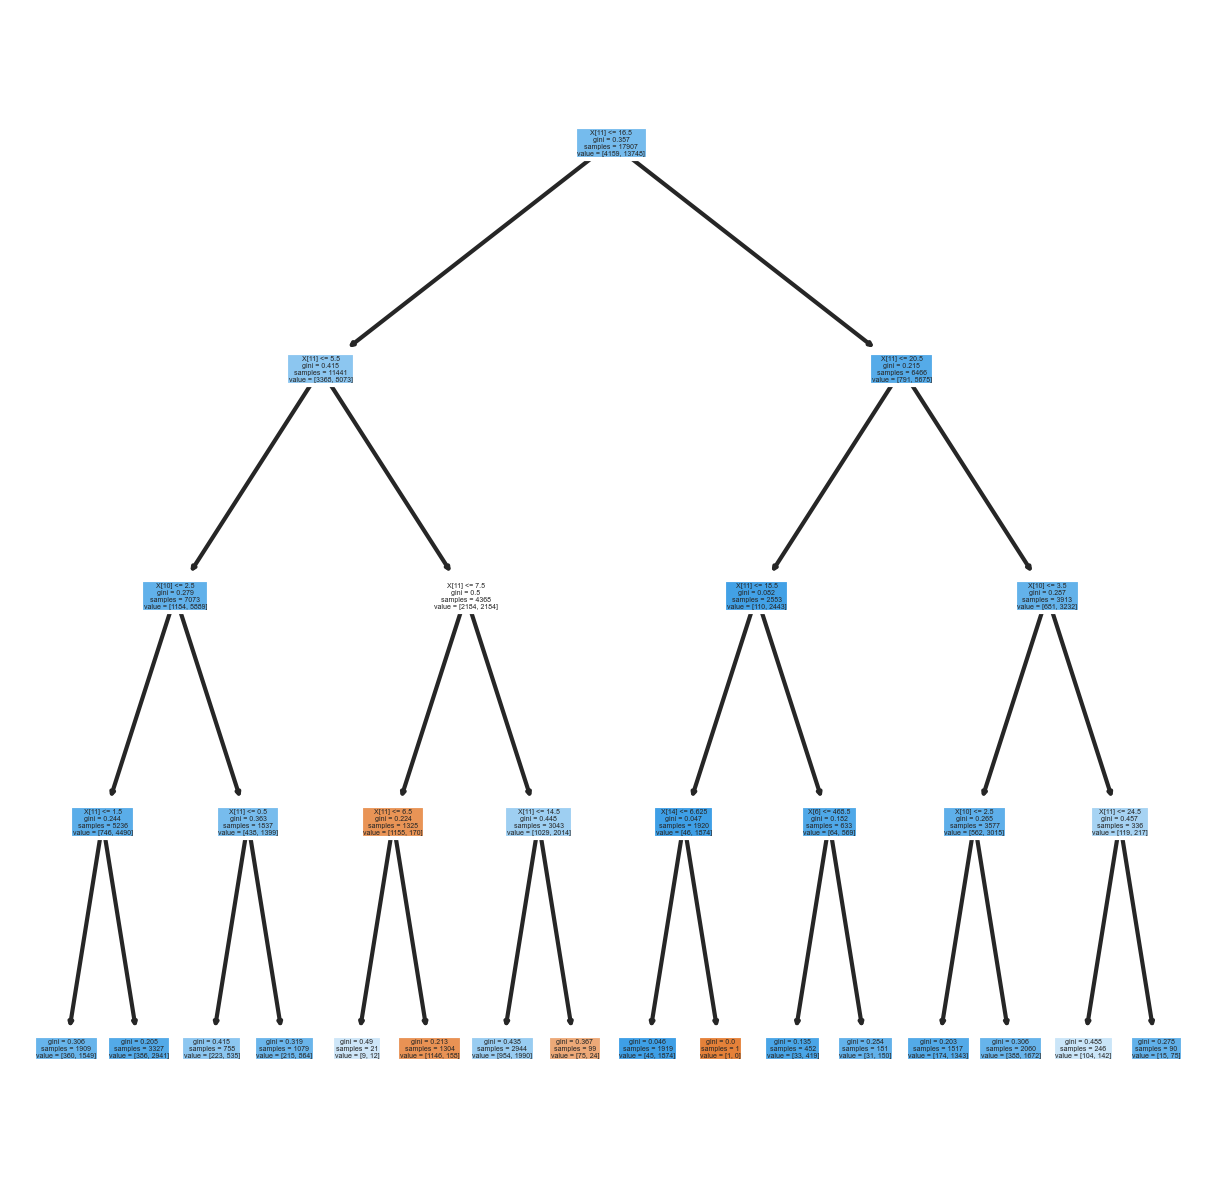

In [76]:
# Визуализирование данных
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model, filled=True)

In [77]:
# Разделение выборки на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(
    x, y,  test_size=0.2, random_state=1)

In [78]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)

In [79]:
print('Дерево решений')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Дерево решений
Mean Absolute Error: 0.27917364600781686
Mean Squared Error: 0.27917364600781686
Root Mean Squared Error: 0.5283688541235345


In [80]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['Preferred Foot'], axis=1), 
                                                    data['Preferred Foot'], test_size=0.5, random_state=1)

In [81]:
# Масштабирование
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [84]:
reg = RandomForestRegressor(n_estimators=20, random_state=0)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [85]:
print('Случайный лес')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Случайный лес
Mean Absolute Error: 0.27931650658923385
Mean Squared Error: 0.14789423721241904
Root Mean Squared Error: 0.38457019802946124
